# 

# Overview

- Check for null counts
- Observe correlation with target variable
- Analyze distribution of features

In [3]:
# Import the necessary packages from utils file
from utils import pd, np, plt, sns

In [4]:
#load dataframe
df = pd.read_csv('../data/interim/eeg_motor_imagery.csv')
df.head()

,trial_id,subject_id,ch1_std,ch1_mean,ch1_max,ch1_min,ch2_std,ch2_mean,ch2_max,ch2_min,...,ch62_min,ch63_std,ch63_mean,ch63_max,ch63_min,ch64_std,ch64_mean,ch64_max,ch64_min,label
0,0,S001R04.edf,0.000040,-0.000021,0.000101,-0.000134,0.000038,-0.000023,0.000092,-0.000138,...,-0.000058,0.000038,1.294466e-05,0.000113,-0.000059,0.000038,-3.761820e-07,0.000114,-0.000081,1
1,672,S001R04.edf,0.000027,0.000005,0.000067,-0.000060,0.000032,0.000010,0.000075,-0.000081,...,-0.000069,0.000033,1.274179e-05,0.000100,-0.000079,0.000030,1.495558e-05,0.000130,-0.000053,3
2,1328,S001R04.edf,0.000051,0.000002,0.000093,-0.000122,0.000052,0.000002,0.000093,-0.000113,...,-0.000082,0.000033,-4.349705e-07,0.000080,-0.000080,0.000047,1.516147e-06,0.000112,-0.000106,1
3,2000,S001R04.edf,0.000038,0.000001,0.000095,-0.000088,0.000046,0.000003,0.000101,-0.000105,...,-0.000117,0.000048,9.954523e-06,0.000135,-0.000113,0.000046,8.908144e-06,0.000133,-0.000104,2
4,2656,S001R04.edf,0.000038,-0.000013,0.000097,-0.000105,0.000037,-0.000011,0.000103,-0.000088,...,-0.000080,0.000040,-1.790916e-05,0.000138,-0.000085,0.000039,-1.407863e-05,0.000152,-0.000079,1


In [5]:
#Observe target variable
df['label'].head(10)

0    1
1    3
2    1
3    2
4    1
5    2
6    1
7    3
8    1
9    3
Name: label, dtype: int64

In [6]:
#check for columns with  more than one null 
null_counts = df.isna().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [7]:
# observe unique count for columns
df[['trial_id', 'subject_id', 'label']].nunique()


trial_id      30
subject_id     1
label          3
dtype: int64

In [ ]:
# Find constant features

In [91]:
#Check for high correlation with target

correlations = df.corr(numeric_only=True)['label'].sort_values(ascending=False)
correlations.head(15)

label       1.000000
ch60_max    0.430985
ch59_max    0.399256
ch60_std    0.335998
ch61_std    0.302231
ch54_max    0.298339
ch12_max    0.289713
ch55_max    0.289164
ch53_max    0.278857
ch52_max    0.273992
ch58_max    0.255913
ch56_std    0.248864
ch59_std    0.234539
ch11_max    0.232054
ch55_std    0.229887
Name: label, dtype: float64

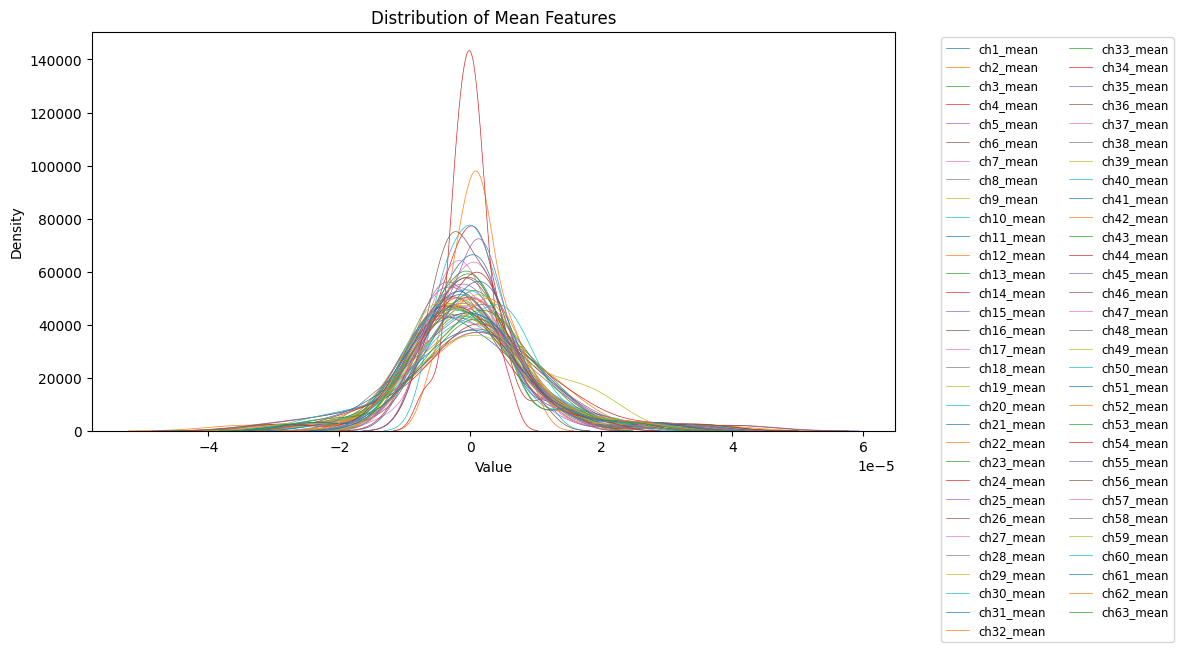

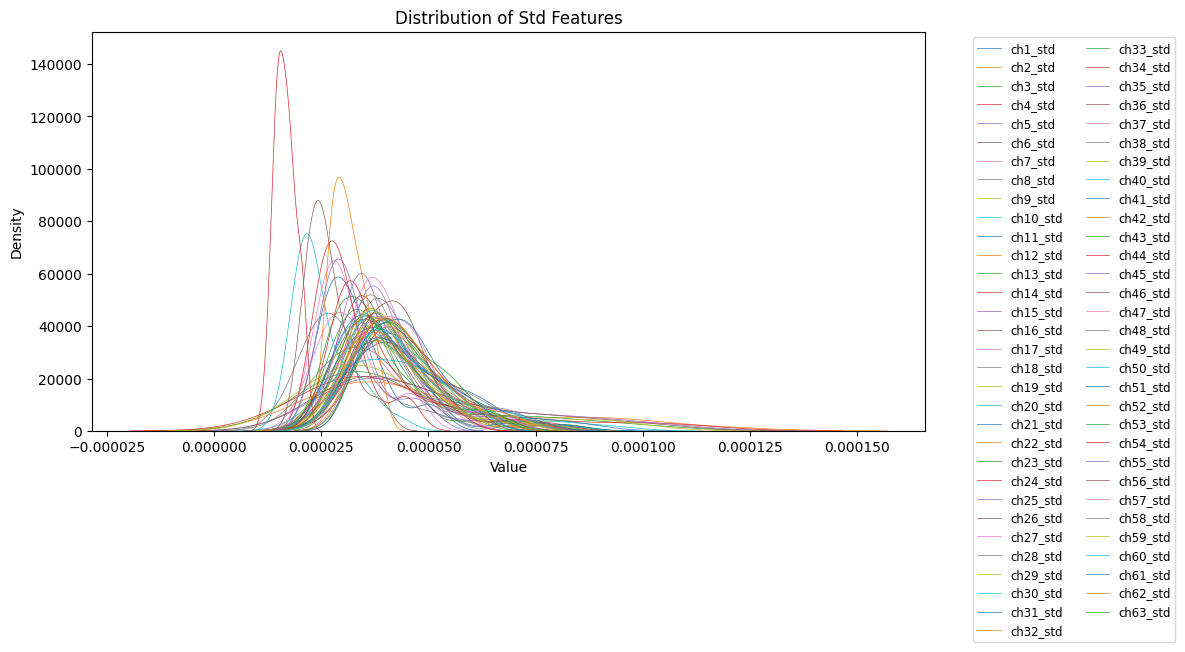

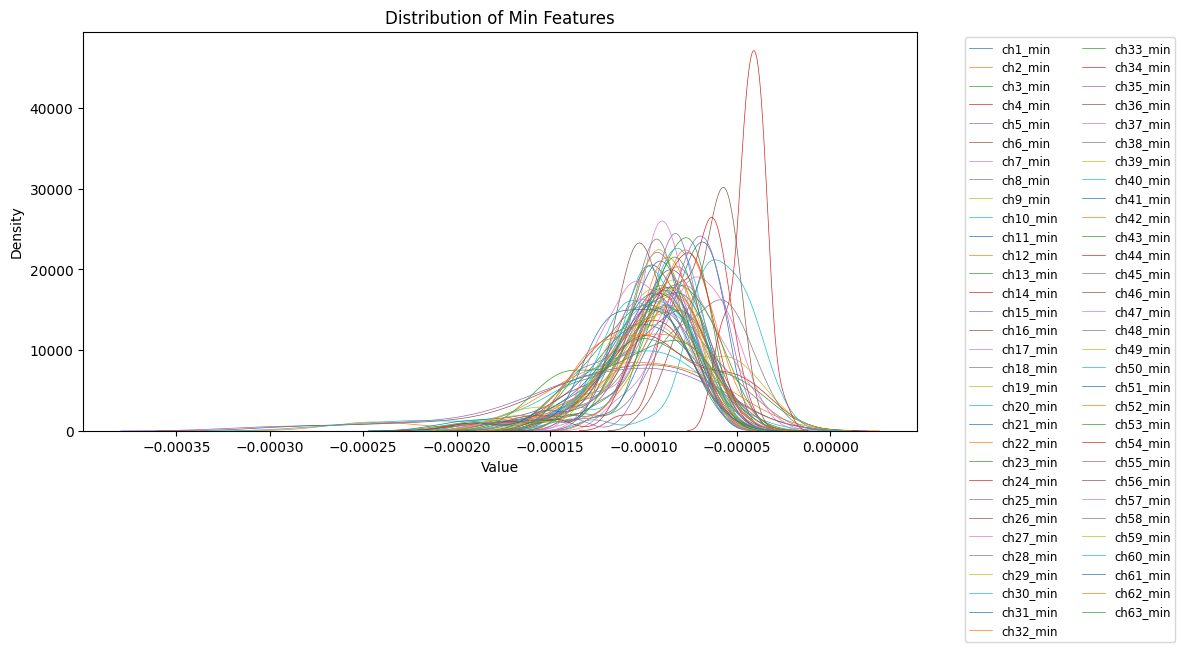

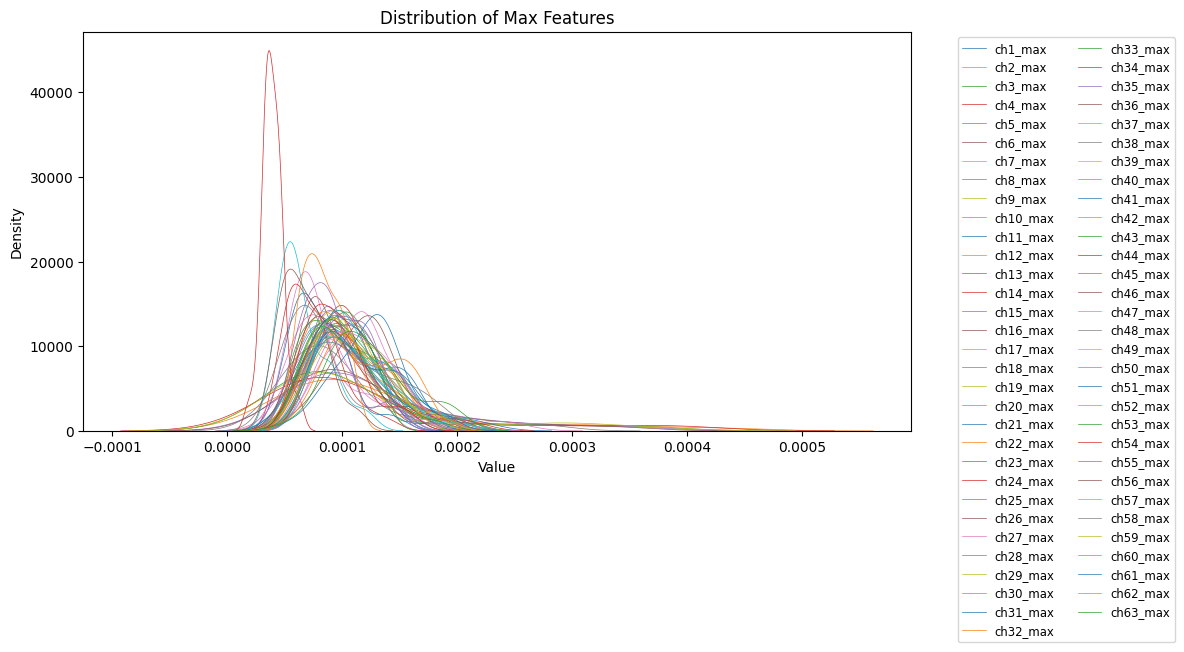

In [ ]:
#Analyze Distribution

#filter group of features per metric
mean_features = [f'ch{i}_mean' for i in range(1,64)]

std_features = [f'ch{i}_std' for i in range(1,64)]

min_features = [f'ch{i}_min' for i in range(1,64)]

max_features = [f'ch{i}_max' for i in range(1,64)]

#create function to plot each group
def plot_grouped_distributions(df, feature_group, title):
    plt.figure(figsize=(12, 6))
    for feature in feature_group:
        sns.kdeplot(df[feature], label=feature, linewidth=0.5)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize='small')
    plt.tight_layout()
    plt.show()

#plot distribution of each group
plot_grouped_distributions(df, mean_features, "Distribution of Mean Features")
plot_grouped_distributions(df, std_features, "Distribution of Std Features")
plot_grouped_distributions(df, min_features, "Distribution of Min Features")
plot_grouped_distributions(df, max_features, "Distribution of Max Features")


In [25]:
# print list of features with low variance
(df.std(numeric_only=True).sort_values(ascending=True)).head(20)


ch44_std     0.000002
ch44_mean    0.000003
ch42_std     0.000004
ch42_mean    0.000004
ch40_mean    0.000005
ch46_mean    0.000005
ch46_std     0.000005
ch55_mean    0.000005
ch14_mean    0.000005
ch64_std     0.000006
ch21_mean    0.000006
ch7_mean     0.000006
ch14_std     0.000006
ch40_std     0.000006
ch43_mean    0.000006
ch54_mean    0.000006
ch47_std     0.000007
ch47_mean    0.000007
ch64_mean    0.000007
ch7_std      0.000007
dtype: float64

array([[<Axes: title={'center': 'ch1_std'}>,
        <Axes: title={'center': 'ch2_std'}>,
        <Axes: title={'center': 'ch3_std'}>,
        <Axes: title={'center': 'ch4_std'}>,
        <Axes: title={'center': 'ch5_std'}>,
        <Axes: title={'center': 'ch6_std'}>,
        <Axes: title={'center': 'ch7_std'}>,
        <Axes: title={'center': 'ch8_std'}>],
       [<Axes: title={'center': 'ch9_std'}>,
        <Axes: title={'center': 'ch10_std'}>,
        <Axes: title={'center': 'ch11_std'}>,
        <Axes: title={'center': 'ch12_std'}>,
        <Axes: title={'center': 'ch13_std'}>,
        <Axes: title={'center': 'ch14_std'}>,
        <Axes: title={'center': 'ch15_std'}>,
        <Axes: title={'center': 'ch16_std'}>],
       [<Axes: title={'center': 'ch17_std'}>,
        <Axes: title={'center': 'ch18_std'}>,
        <Axes: title={'center': 'ch19_std'}>,
        <Axes: title={'center': 'ch20_std'}>,
        <Axes: title={'center': 'ch21_std'}>,
        <Axes: title={'center': 'ch22_std

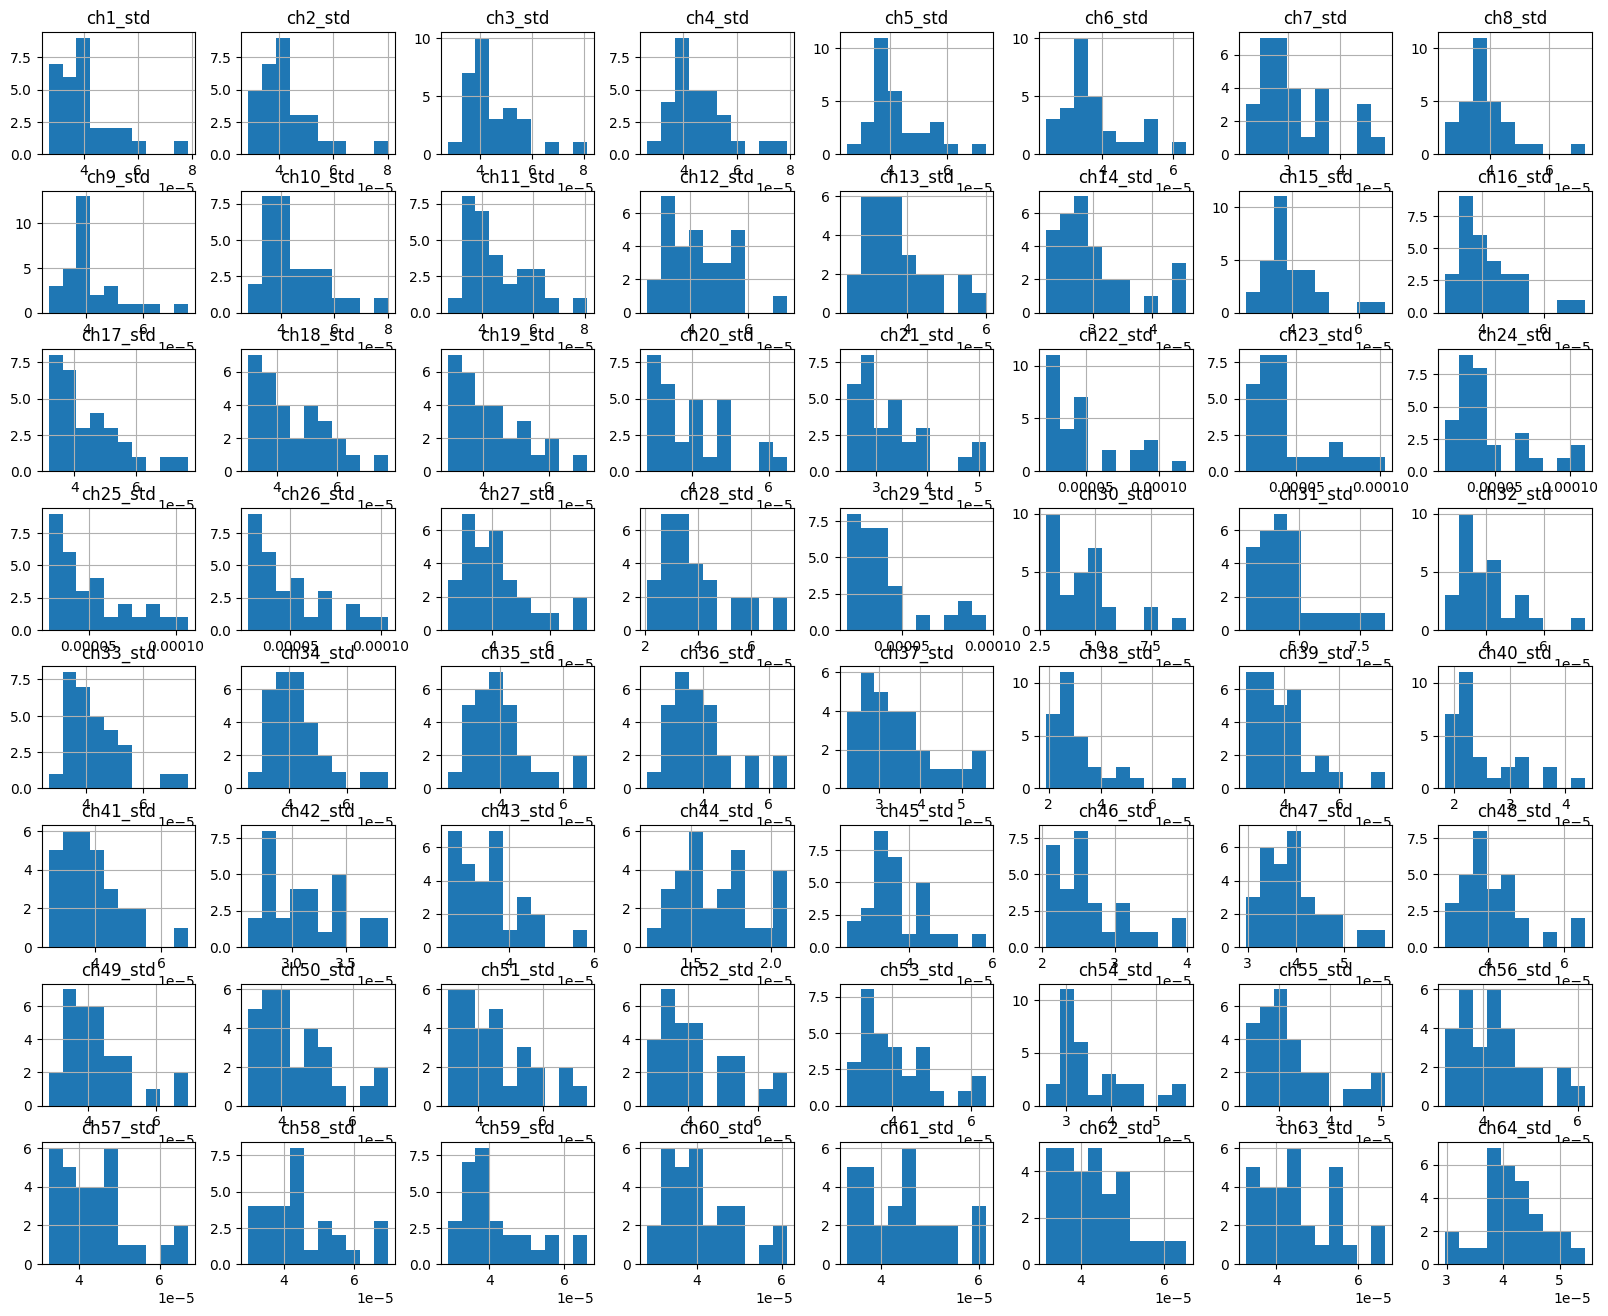

In [24]:
# Print histogram charts for std features 
std_features = [col for col in df.columns if 'std' in col]

df[std_features].hist(figsize=(20, 16), layout=(8, 8))


# Key Takeaways
 - Label 1 represents rest state and should be removed from the dataset. After removal, labels should be remapped: 1 → left hand, 2 → right hand
 - Dataset contains no null values
 - Each trial_id is unique within a subject_id
 - Several features show moderate correlation (0.2-0.4) with the target label
 - Some features have low variance